# Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variables (predictors) and the dependent variable (outcome).

The goal of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that describes the relationship between the independent and dependent variables. This line is defined by its equation:

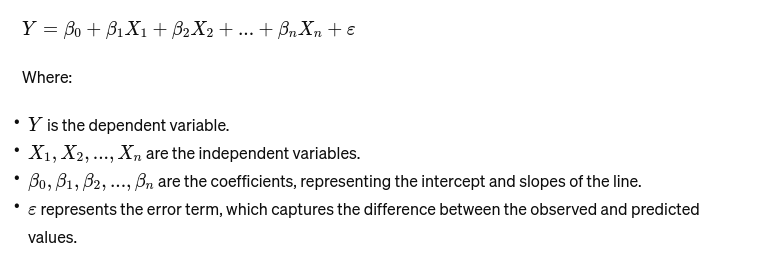


The coefficients are estimated using the method of least squares, which minimizes the sum of the squared differences between the observed and predicted values. Once the coefficients are estimated, the linear regression model can be used to make predictions for new data points or to understand the relationship between the variables.

Linear regression is widely used in various fields, including economics, finance, social sciences, engineering, and machine learning. It serves as a fundamental tool for understanding and analyzing relationships between variables and for making predictions based on those relationships.

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Calculate the weights using the least squares method
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Make predictions using the weights
        return X.dot(self.weights)

In [2]:
  # Create some example data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 3, 5, 7, 11])

# Create a LinearRegression object and fit the data
reg = LinearRegression()
reg.fit(X, y)

# Make some predictions
predictions = reg.predict(X)
print(predictions)     

[ 1.2  3.4  5.6  7.8 10. ]


**Added L2 Regularization**

In this code, we added an `alpha` parameter to the `LinearRegression` class, which represents the strength of the L2 regularization. We then modified the `fit` method to include the L2 regularization term in the calculation of the weights.

The L2 regularization term is added to the diagonal of the matrix `X^T * X` before taking the inverse. This has the effect of penalizing large weights, which can help prevent overfitting.

Here is an example of how to use this class with L2 regularization:

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self, alpha=0.0):
        self.weights = None
        self.alpha = alpha

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Calculate the weights using the least squares method with L2 regularization
        self.weights = np.linalg.inv(X.T.dot(X) + self.alpha * np.eye(X.shape[1])).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Make predictions using the weights
        return X.dot(self.weights)


**Adding Gradient descent to minimize cost function**

In [4]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, alpha=0.0):
        self.weights = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.alpha = alpha

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Initialize weights to zeros
        self.weights = np.zeros(X.shape[1])
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Calculate the prediction
            y_pred = X.dot(self.weights)
            
            # Calculate the cost
            cost = np.mean((y - y_pred) ** 2) + self.alpha * np.sum(self.weights ** 2)
            
            # Calculate the gradient
            gradient = -2 * X.T.dot(y - y_pred) + 2 * self.alpha * self.weights
            
            # Update the weights
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.insert(X, 0, 1, axis=1)
        
        # Make predictions using the weights
        return X.dot(self.weights)

I added a `learning_rate` parameter to the `__init__` method, which controls the step size of each gradient descent iteration. I also added a `n_iterations` parameter to control the number of gradient descent iterations.

I then modified the `fit` method to use gradient descent to minimize the cost function. I initialize the weights to zeros, then iterate over the number of iterations. In each iteration, I calculate the prediction, cost, and gradient, then update the weights using the gradient descent update rule.

The cost function is the mean squared error (MSE) plus the L2 regularization term. The gradient is the derivative of the cost function with respect to the weights.

Here is an example of how to use this class with gradient descent:

In [5]:
# Create some example data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 3, 5, 7, 11])

# Create a LinearRegression object with gradient descent and fit the data
reg = LinearRegression(learning_rate=0.01, n_iterations=1000, alpha=0.1)
reg.fit(X, y)

# Make some predictions
predictions = reg.predict(X)
print(predictions)

[1.31048028 3.46366721 5.61685413 7.77004106 9.92322799]
